In [76]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [77]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [78]:
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [79]:
base = automap_base()
base.prepare(engine,reflect=True)
base.classes.keys()

['measurement', 'station']

In [80]:
measurement = base.classes.measurement
station = base.classes.station

In [81]:
session = Session(engine)

In [82]:
min_date = session.query(measurement.date).order_by(measurement.date).first()
max_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f'Min date: {min_date[0]}, Max date: {max_date[0]}')

Min date: 2010-01-01, Max date: 2017-08-23


In [83]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [84]:
columns = inspector.get_columns('measurement')
for column in columns:
    pks = ''
    if column['primary_key'] == 1:
        pks = 'Primary Key'
    print(column['name'],column['type'],pks)

id INTEGER Primary Key
station TEXT 
date TEXT 
prcp FLOAT 
tobs FLOAT 


In [85]:
precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= dt.date(2016,8,23)).all()

In [86]:
precipitation_df = pd.DataFrame(precipitation_data, columns = ['Date','Precipitation']).sort_values(by='Date')
precipitation_df.set_index('Date',inplace=True)
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


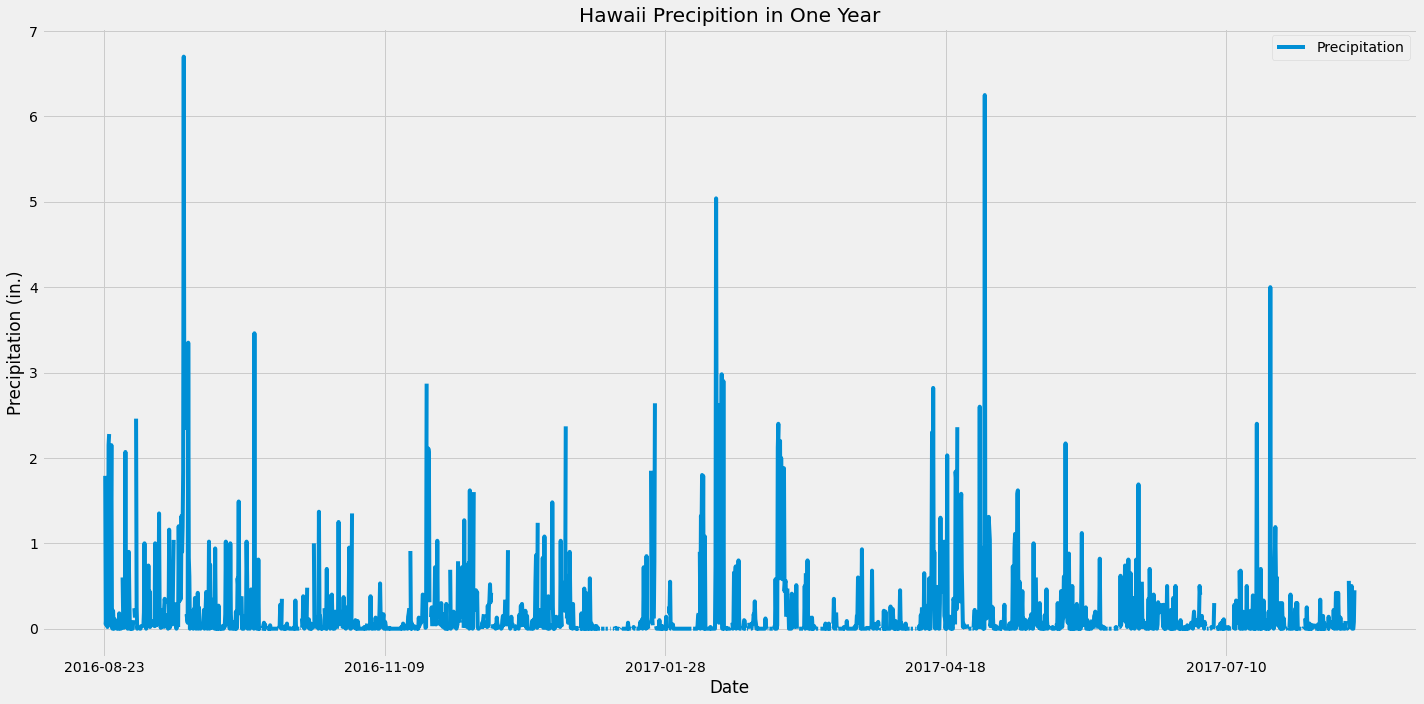

In [87]:
fig, ax = plt.subplots(figsize = (20,10))
precipitation_df.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in.)')
ax.set_title('Hawaii Precipition in One Year')
plt.tight_layout()
plt.show()

In [88]:
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [89]:
session.query(station.id).distinct().count()

9

In [90]:
station = session.query(measurement.station,func.count(measurement.station))

In [91]:
station = station.group_by(measurement.station)

In [92]:
station_count = station.order_by(func.count(measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [93]:
most_active_station = station_count[0][0]
temp = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()
temp

[(54.0, 85.0, 71.66378066378067)]

In [97]:
temp_obs =  session.query(measurement.date,measurement.tobs).filter(measurement.station == most_active_station)
temp_obs = temp_obs.filter(measurement.date >= dt.date(2016,8,23)).all()
temp_observation_df = pd.DataFrame(temp_obs,columns = ['Date','Temperature'])

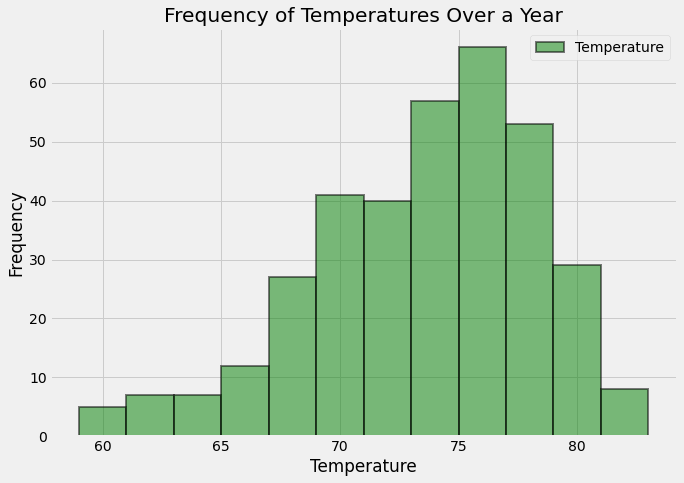

In [108]:
fig, ax = plt.subplots(figsize = (10,7))
temp_observation_df.plot.hist(bins=12, ax = ax,color = 'g',alpha=0.5,edgecolor='k',linewidth=2)
ax.set_xlabel('Temperature')
ax.set_title('Frequency of Temperatures Over a Year')
plt.show()